# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1zFa8nKTmnZIqH2ay_Ck9m7kV_Dcm9bje?usp=sharing)

https://wikidocs.net/92961

02-10 한국어 전처리 패키지(Text Preprocessing Tools for Korean Text)

1. PyKoSpacing

전희원님이 개발한 PyKoSpacing은 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지입니다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있습니다.

In [2]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

임의의 문장을 임의로 띄어쓰기가 없는 문장으로

In [3]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


PyKoSpacing의 입력으로 사용하여 원 문장과 비교

In [4]:
!pip install h5py

In [5]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git --no-deps

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-_t0n1tnh
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-_t0n1tnh
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 5bb0b3e8f62c1936a430745297821a9ecd78beb1
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268698 sha256=cfd752129b4bd4b8f14bbf98d41f3dc3e21e4e59e68ec37b368e9d1b49922422
  Stored in directory: /tmp/pip-ephem-wheel-cache-22pz3g75/wheels/76/b3/33/dda14886ee76b8e53eb05580a14dfcf9145e9eb9d282c53f28
Successfully built pykospacing


In [6]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


2. Py-Hanspell

In [7]:
pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-zoui465k
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-zoui465k
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4810 sha256=fd99f00386498ad5129442776cd89bcfc99ed42db21ff1bb67a5902bd7e795b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qbd21_v/wheels/2e/43/cc/753c9e1d91affb9ea40e186cea5654fb9231deb454da6724e5
Successfully built py-hanspell


Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

In [8]:
from hanspell import spell_checker

In [9]:
sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지"
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


이 패키지는 띄어쓰기 또한 보정합니다. PyKoSpacing에 사용한 예제를 그대로 사용

In [10]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) #앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


3. SOYNLP를 이용한 단어 토큰화

soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저\
비지도 학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석합니다. soynlp 단어 토크나이저는 내부적으로 단어 점수 표로 동작합니다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용합니다.



In [11]:
pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.9 MB/s eta 0:00:00


1. 신조어 문제\
soynlp를 소개하기 전에 기존의 형태소 분석기가 가진 문제는 무엇이었는지, SOYNLP가 어떤 점에서 유용한지 정리해봅시다. 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있었습니다.

In [12]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 21.9 MB/s eta 0:00:00


In [13]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, \
최애돌은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리된 결과

에이비식스라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식이지요. 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp

2. 학습하기

soynlp는 기본적으로 학습에 기반한 토크나이저이므로 학습에 필요한 한국어 문서를 다운로드

In [14]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [15]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7c10211556c0>)

훈련 데이터를 다수의 문서로 분리

In [16]:
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

총 3만 91개의 문서가 존재

In [17]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i + 1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

정상 출력되는 것을 확인\
soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 학습 과정을 거쳐야 합니다.\
WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산

In [18]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.542 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


3. SOYNLP의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도\
이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.

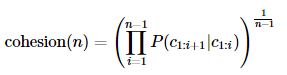

'반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정

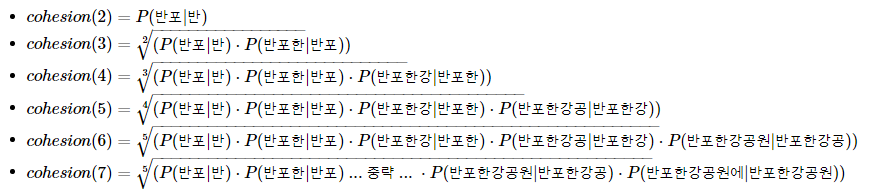

In [19]:
word_score_table['반포한'].cohesion_forward

0.08838002913645132

그렇다면 '반포한강'의 응집 확률은 '반포한'의 응집 확률보다 높을까

In [20]:
word_score_table['반포한강'].cohesion_forward

0.19841268168224552

'반포한강'은 '반포한'보다 응집 확률이 높습니다. 그렇다면 '반포한강공'은 어떨까요?

In [21]:
word_score_table['반포한강공'].cohesion_forward

0.2972877884078849

'반포한강공원'은 어떨까요?

In [22]:
word_score_table['반포한강공원'].cohesion_forward

0.37891487632839754

여기다가 조사 '에'를 붙인 '반포한강공원에'는 어떨까

In [23]:
word_score_table['반포한강공원에'].cohesion_forward

0.33492963377557666

결합도는 '반포한강공원'일 때가 가장 높았습니다. 응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'이라고 볼 수 있겠습니다.

4. SOYNLP의 브랜칭 엔트로피(branching entropy)

Branching Entropy는 확률 분포의 엔트로피값을 사용\
주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도

첫번째 문자는 '디'입니다. 다음에 등장할 문자를 맞춰보세요. 솔직히 가늠이 잘 안 가지요? '디'로 시작하는 단어가 얼마나 많은데요. 정답은 '스' 입니다.

이제 '디스'까지 나왔네요. '디스 '다음 문자는 뭘까요? '디스카운트'라는 단어가 있으니까 '카'일까? 아니면 '디스코드'라는 단어가 있으니까 '코'인가? 생각해보니 '디스코'가 정답일 수도 있겠네요. 그러면 '코'인가? '디스아너드'라는 게임이 있으니까 '아'? 이 단어들을 생각하신 분들은 전부 틀렸습니다. 정답은 '플'이었습니다.

'디스플'까지 왔습니다. 다음 문자 맞춰보세요. 이제 좀 명백해집니다. 정답은 '레'입니다. '디스플레' 다음에는 어떤 문자일까요? 정답은 '이'입니다. 제가 생각한 단어는 '디스플레이'였습니다.

브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보입니다.

In [24]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [25]:
word_score_table["디스플"].right_branching_entropy

-0.0

'디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다.

In [26]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 증가합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문입니다. 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미합니다. 그리고 이 값으로 단어를 판단하는 것이 가능하겠죠?

5. SOYNLP의 L tokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [27]:
from soynlp.tokenizer import LTokenizer

In [31]:
scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores = scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

6. 최대 점수 토크나이저

최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저이다. \
띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 토큰화 된 결과를 본다.

In [33]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

4. SOYNLP를 이용한 반복되는 문자 정제

In [34]:
from soynlp.normalizer import *

In [38]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=1))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋ영화존잼쓰ㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


의미없게 반복되는 것은 이모티콘에 한정되지 않는다.

In [37]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats = 3))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하하핫
와하하핫
와하하핫


5. Customized KoNLPy

영어권 언어는 띄어쓰기만해도 단어들이 잘 분리되지만, 한국어는 그렇지 않다고 앞에서 몇 차례 언급했었습니다. 한국어 데이터를 사용하여 모델을 구현하는 것만큼 이번에는 형태소 분석기를 사용해서 단어 토큰화를 해보겠습니다. 그런데 형태소 분석기를 사용할 때, 이런 상황에 봉착한다면 어떻게 해야할까요?

형태소 분석 입력 : '은경이는 사무실로 갔습니다.'\
형태소 분석 결과 : ['은', '경이', '는', '사무실', '로', '갔습니다', '.']

사실 위 문장에서 '은경이'는 사람 이름이므로 제대로 된 결과를 얻기 위해서는 '은', '경이'와 같이 글자가 분리되는 것이 아니라 '은경이' 또는 최소한 '은경'이라는 단어 토큰을 얻어야만 합니다. 이런 경우에는 형태소 분석기에 사용자 사전을 추가해줄 수 있습니다. '은경이'는 하나의 단어이기 때문에 분리하지말라고 형태소 분석기에 알려주는 것입니다.

사용자 사전을 추가하는 방법은 형태소 분석기마다 다른데, 생각보다 복잡한 경우들이 많습니다. 이번 실습에서는 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용합니다.

In [39]:
pip install customized_konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 6.6 MB/s eta 0:00:00


customized_konlpy에서 제공하는 형태소 분석기 Twitter를 사용하여 앞서 소개했던 예문을 단어 토큰화

In [40]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs("은경이는 사무실로 갔습니다.")

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

앞서 소개한 예시와 마찬가지로 '은경이'라는 단어가 '은', '경이'와 같이 분리됩니다. 이때, 형태소 분석기 Twitter에 add_dictionary('단어', '품사')와 같은 형식으로 사전 추가를 해줄 수 있습니다.

In [41]:
twitter.add_dictionary('은경이', 'Noun')

제대로 반영되었는지 동일한 예문을 다시 형태소 분석

In [42]:
twitter.morphs("은경이는 사무실로 갔습니다.")

['은경이', '는', '사무실', '로', '갔습니다', '.']

'은경이'라는 단어가 제대로 하나의 토큰으로 인식되는 것을 확인할 수 있습니다.